In [2]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Análise de Keywords

In [3]:
searchResult = pd.read_csv("acmdl.csv")
len(searchResult)

2002

In [22]:
#Por criação de dicionário
counting = {}
for i in searchResult.keywords:
    keywordsFound = str(i).split(",")
    for word in keywordsFound:
        wordUpper = word.upper()
        if wordUpper in counting:
            counting[wordUpper] = counting[wordUpper]+1
        else:
            counting[wordUpper] = 1

data1 = pd.DataFrame.from_dict(counting,orient='index')
data1

,0
MOBILE INTERACTION,2
UBIQUITOUS COMPUTING,230
METHOD,1
PRIVACY,30
CROWDSOURCING,10
...,...
COMPUTATIONAL BEHAVIORAL SCIENCE,1
DATA CLASSIFICATION,1
FORECASTING ALGORITHM,1
NEURO-FUZZY SYSTEM,1


In [42]:
# Por criação de Series
data = pd.Series([])
for i in searchResult.keywords:
    keywordsFound = str(i).upper().split(",")
    data = data.append(pd.Series(keywordsFound),ignore_index=True)

data = data.value_counts().to_frame()
data = data.drop("NAN")
data.head()

,0
UBIQUITOUS COMPUTING,230
ACTIVITY RECOGNITION,80
MACHINE LEARNING,56
WEARABLE COMPUTING,55
INTERNET OF THINGS,53


In [46]:
big =data.nlargest(50,0)
big

,0
UBIQUITOUS COMPUTING,230
ACTIVITY RECOGNITION,80
MACHINE LEARNING,56
WEARABLE COMPUTING,55
INTERNET OF THINGS,53
MOBILE SENSING,52
SMARTPHONE,46
WEARABLES,35
PRIVACY,30
PERSONAL INFORMATICS,29


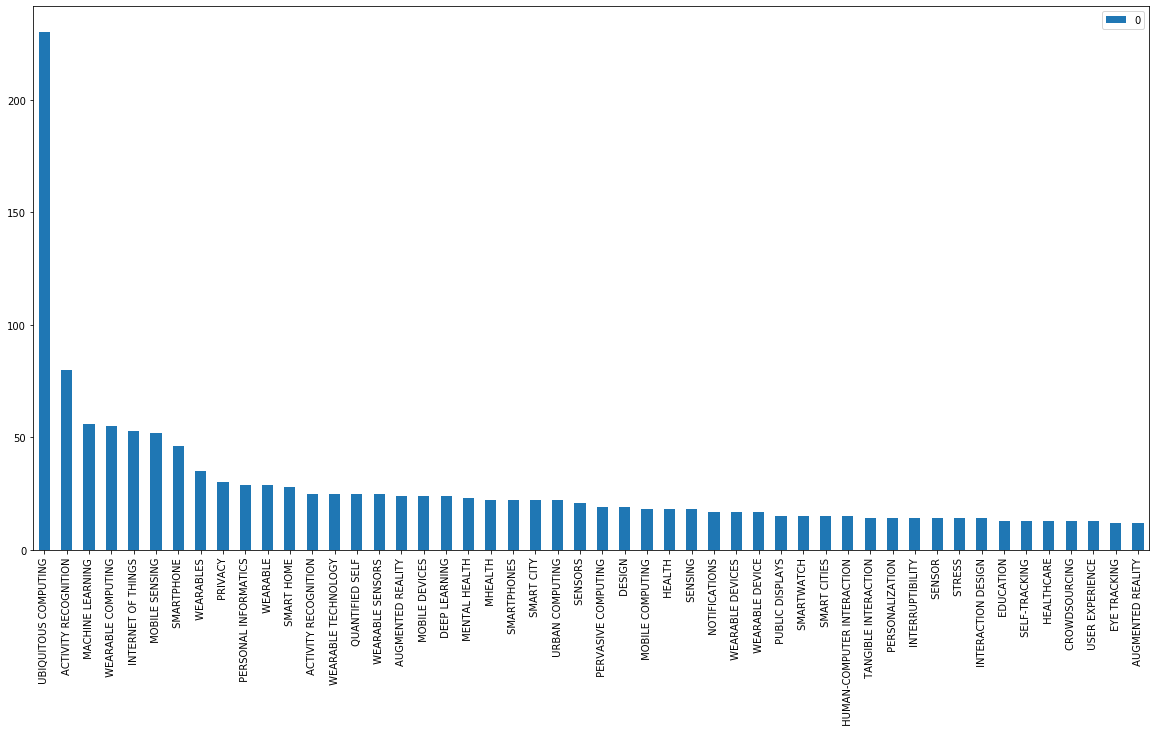

In [48]:
big.plot.bar(figsize=(20,10))

## Análise na IEEE 

## Análise na Elsevier

## Análise na Springer 